## Şablon Eşleme 
- Şablon eşleştirme, bir şablon görüntünün konumunu daha büyük br görüntüde aramak ve bulmak için kullanılır.
- Şablon görüntüsünü giriş görüntüsünün üzerine kaydırır ve her kaydırma işlemi için bir eşleşme skoru hesaplar.
- Kaydırarak şablonu bir seferde bir piksel hareket ettirmeyi kast ediyoruz.
- Her konumda, o konumdaki eşleşmein ne kadar "iyi" veya "kötü" olduğunu (veya şablonun kaynak görüntünün o belirli alanına ne kadar benzer olduğunu) temsl edecek şekilde bir skor hesaplar.
  

In [26]:
import cv2
import matplotlib.pyplot as plt

### Template Ekleme

In [27]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

(433, 650, 3)


In [28]:
template = cv2.imread('cat_face.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
print(template.shape)
h, w ,c = template.shape

(219, 253, 3)


### Gerekli Metodların tanımlanması 
- bu metodların ana hedefi iki resim arasındaki koralasyonu hesaplamaktır.

In [29]:
methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR",
           "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

(215, 398)


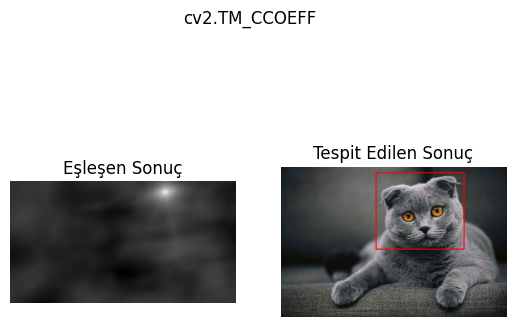

(215, 398)


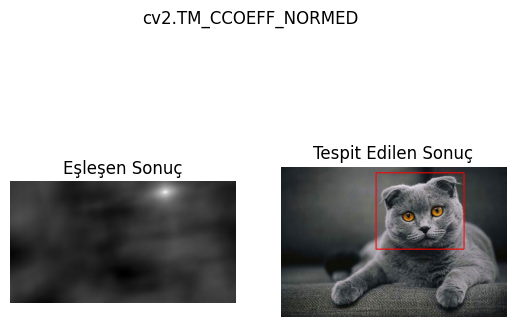

(215, 398)


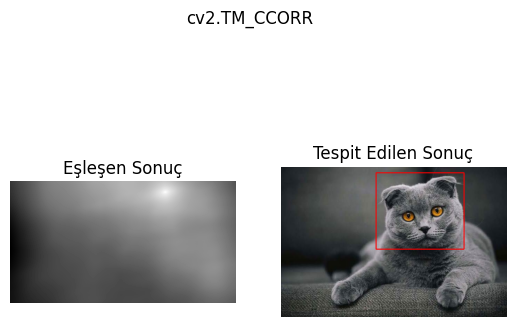

(215, 398)


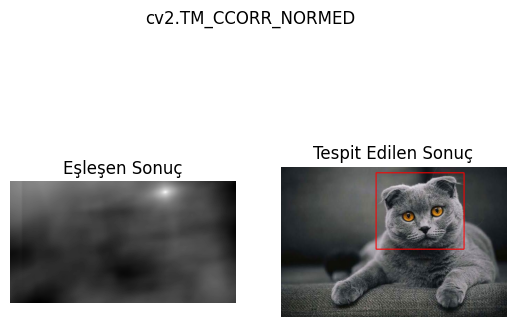

(215, 398)


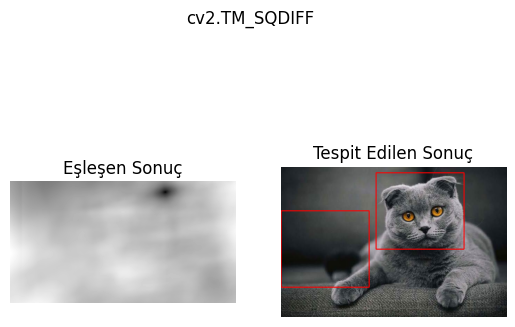

(215, 398)


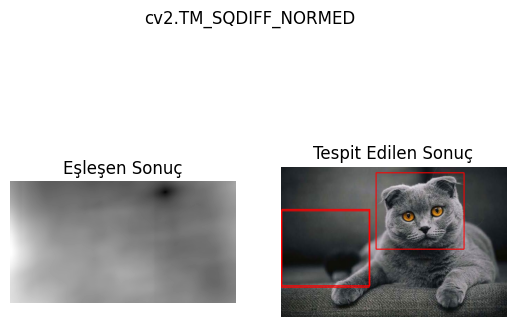

In [30]:
for meth in methods:
    #string to function
    method = eval(meth) # "cv2.TM_CCOEFF" -> cv2.TM_CCOEFF
    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    print(res.shape)
    #minMaxLoc returns the location of the minimum and maximum values
    min_val, max_val, min_loc, max_loc =  cv2.minMaxLoc(res)

    # Bu iki metgodun min ve max locationları ters diğerleriyle aynı olması için
    if method in ["cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"] : 
        top_left = min_loc
    else:
        top_left = max_loc
    
    #kutucuğun sağ alt köşesini bulmak için
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #kutucuk çizimi
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    # Göreselleştirme 
    plt.figure()
    plt.subplot(121) # 1 satır 2 sütun 1. grafik
    plt.imshow(res, cmap='gray'),plt.axis("off") # x ve y eksenlerini gizle
    plt.title('Eşleşen Sonuç')
    plt.subplot(122) # 1 satır 2 sütun 2. grafik
    plt.imshow(img, cmap='gray')
    plt.title('Tespit Edilen Sonuç') , plt.axis("off") 
    plt.suptitle(meth)
    plt.show()
